### SVM代码练习

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

d:\anaconda3_2018.12\envs\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [4]:
# 读取数据集
x, y = [], []
data = np.loadtxt('./svm_test_data.txt',delimiter=',', dtype='f8')
# 最后一列为标签
x = data[:, :-1]
y = data[:, -1]

In [5]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=5)

In [6]:
# 创建训练模型
model = SVC(kernel='rbf', C=600, gamma=0.01)
model.fit(train_x, train_y)

SVC(C=600, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# 使用模型预测测试集数据，输出分类报告
pred_test_y = model.predict(test_x)
report = classification_report(test_y, pred_test_y)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        45
         1.0       0.88      0.97      0.92        30

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75



### 画图

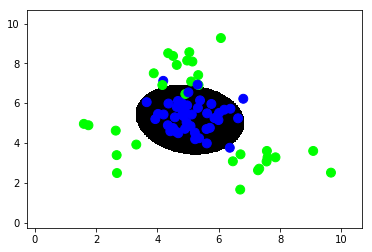

In [9]:
# 模型的实际分界线
n = 500
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n),np.linspace(l, r, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))

grid_z = model.predict(samples)
grid_z = grid_z.reshape(grid_x.shape)

plt.pcolormesh(grid_x, grid_y, grid_z,cmap='gray')
plt.scatter(test_x[:, 0], test_x[:, 1],c=test_y, cmap='brg', s=80)